### Overview 😎

In this notebook we generate class prototypes for any dataset in the UCR archive. We also make use of handy functionality from tslearn and sklearn_extra. Class prototypes are instances that are maximally representative of a class. They are a popular tool for XAI and can also be used for classification purposes. There are many intricate and clever ways of retrieving class prototypes. However, as a simple baseline we fit k-medoids clustering on each class and retrieve the centroid. This class centroid acts as the prototype. This code can easily be tailored to work for image or tabular data and could also be extended to multivariate time series data. We can also visualize the prototypes❗

In [1]:
#Importing packages. The standard stuff. 
import numpy as np
import pandas as pd
import sklearn
import tslearn
from tslearn.datasets import UCR_UEA_datasets
import sklearn_extra
from sklearn_extra.cluster import KMedoids
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tslearn.utils import to_sklearn_dataset
%matplotlib inline 

In [2]:
def ucr_data_loader(dataset):
    
    X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset(dataset)    
    return X_train, y_train, X_test, y_test


def label_encoder(training_labels, testing_labels): # convert labes from [-1,1] to [0,1] etc. 
    
    le = preprocessing.LabelEncoder()
    le.fit(np.concatenate((training_labels, testing_labels), axis=0))
    y_train = le.transform(training_labels)
    y_test = le.transform(testing_labels)
    
    return y_train, y_test

In [3]:
def km_prototyper_UCR(dataset):
    
    #initial preprocessing
    x_train, y_train, x_test, y_test = ucr_data_loader(dataset)
    y_train, y_test = label_encoder(y_train, y_test)
    x_train = to_sklearn_dataset(x_train)
    x_test = to_sklearn_dataset(x_test)
    
    
    #generating prototypes using kmediods
    prototypes = []
    for ts_class_label in range(0,len(np.unique(y_train))): #assuming training set has instances of all classes (NB watch out for Label Shift)
        
        x_train_subset = [x_train[i] for i in np.where(np.max(y_train.reshape(-1,1), axis=1)==ts_class_label)[0]]
        x_train_subset = np.array(x_train_subset)
        
        kmedoids = KMedoids(n_clusters=1, random_state=0).fit(x_train_subset.reshape(x_train_subset.shape[0],x_train_subset.shape[1]))
        prototypes.append(kmedoids.cluster_centers_)
    
    return prototypes

In [4]:
km_prototypes = km_prototyper_UCR(dataset='ecg200')

([<matplotlib.lines.Line2D at 0x1cd5d61a198>],
 [<matplotlib.lines.Line2D at 0x1cd5d61a2b0>])

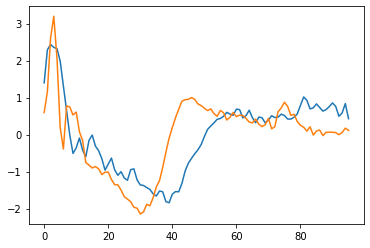

In [5]:
plt.plot(km_prototypes[0].flatten()), plt.plot(km_prototypes[1].flatten()) #more plots when we go beyond binary problems!